# Introduction to Room Impulse Response 

A room impulse response (RIR) is a fundamental concept in the field of audio and acoustics. It describes how sound propagates and interacts within an enclosed space, such as a room. The impulse response is a mathematical representation of the acoustic characteristics of a room and provides information about how sound waves behave within that environment.

Here's how it works:

1. **Impulse Source**: To measure the RIR, you typically start with an impulse source, like a loudspeaker that emits a short, loud burst of sound. This burst is often referred to as an "impulse."

2. **Microphone**: You place a microphone in the room to capture the sound, specifically the response of the room to the impulse.

3. **Recording**: The microphone records the sound over time, creating an audio signal that contains the direct sound from the source, as well as the reflections and reverberations caused by the room's surfaces (walls, floors, ceiling, etc.).

4. **Processing**: The recorded audio signal is then processed to extract the room impulse response. This is typically done by comparing the recorded sound to the original impulse signal. The result is a mathematical function that describes the time-varying characteristics of the sound as it bounces around the room, decays, and eventually becomes inaudible.

The room impulse response contains crucial information about the acoustic properties of a room. It can be used in various applications, such as:

1. **Room Acoustics Analysis**: It helps in understanding how sound waves interact with room surfaces, leading to insights into room acoustics. This is valuable in fields like architectural acoustics and concert hall design.

2. **Audio Signal Processing**: RIRs are used in audio signal processing to simulate the acoustics of a particular space. This is especially important in creating realistic audio effects in virtual reality, gaming, or audio production.

3. **Acoustic Simulation**: In fields like virtual reality, acoustics simulations use RIRs to provide realistic spatial audio experiences by accurately modeling how sound behaves in different environments.

4. **Room Correction**: In home audio systems, RIRs can be used to adjust and optimize the audio output of speakers to compensate for the room's acoustics, leading to better sound quality.

To summarize, a room impulse response is a critical tool for understanding and manipulating the acoustic characteristics of a room, enabling various applications in audio engineering, acoustics research, and immersive audio experiences.

In [5]:
pip install numpy matplotlib pyroomacoustics

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pyroomacoustics as pra
import matplotlib.pyplot as plt

In [16]:
# Set the room dimensions and create the room object
room_dim = [8, 6, 3]  # room dimensions in meters [x, y, z]
room = pra.ShoeBox(room_dim, fs=16000, max_order=17, absorption=0.5)

# Add sources to the room
source_location = [5, 4, 1.5]  # source location in meters [x, y, z]
room.add_source(source_location)

# Add microphones to the room
mic_locations = np.array(
    [[2, 1, 1.5],  # location of first microphone
     [5, 5, 1.5],  # location of second microphone
     [3, 3, 1.5]]  # location of third microphone
).T  # transpose so each column represents a microphone
room.add_microphone_array(pra.MicrophoneArray(mic_locations, fs=room.fs))


In [17]:

# Compute the room impulse responses
room.compute_rir()

# Access the resulting room impulse responses
rirs = room.rir  # shape: (n_mics, n_sources, n_samples)


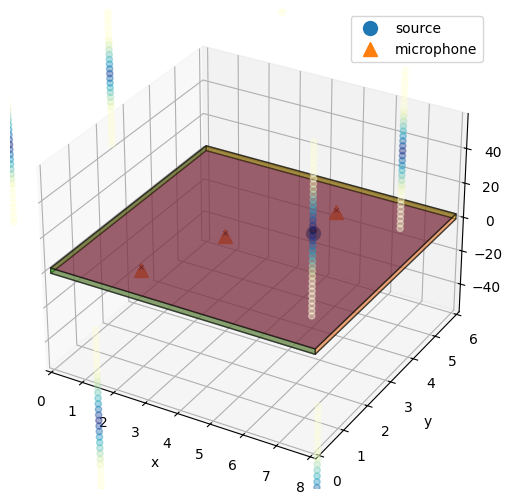

In [18]:

# plot the room and sources
fig, ax = room.plot()
ax.plot(source_location[0], source_location[1], 'o', markersize=10, label='source')
ax.plot(mic_locations[0], mic_locations[1], '^', markersize=10, label='microphone')
ax.legend()
ax.set_xlim([0, room_dim[0]])
ax.set_ylim([0, room_dim[1]])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


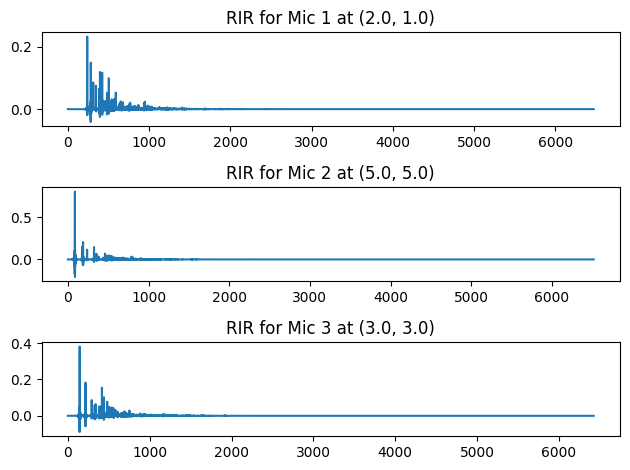

In [19]:

# Plot RIRs
plt.figure()
plt.subplot(311)
plt.title('RIR for Mic 1 at ({}, {})'.format(mic_locations[0][0], mic_locations[1][0]))
plt.plot(room.rir[0][0])
plt.subplot(312)
plt.title('RIR for Mic 2 at ({}, {})'.format(mic_locations[0][1], mic_locations[1][1]))
plt.plot(room.rir[1][0])
plt.subplot(313)
plt.title('RIR for Mic 3 at ({}, {})'.format(mic_locations[0][2], mic_locations[1][2]))
plt.plot(room.rir[2][0])
plt.tight_layout()
plt.show()
